<a href="https://colab.research.google.com/github/Eduardo-aris-silva/imersao-dados-4/blob/main/imersao_dados_4_desafio_aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafios `Aula 02` | Imersão Dados Alura 4ª Edição
**Desafios desta aula:**
- Criar uma escala de valores em milhões.
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).
- Preço do metro quadrado por bairro e plotar em um gráfico ideal.
- Explorar as bibliotecas de visualizações e colocar as suas conclusão.
-Pesquisar um visualização para analisar os quartis, mediana e outliers.

>*Link para a [imersão dados](https://www.alura.com.br/imersao-dados-4/aula02-tratamento-dados-primeiros-graficos)*


###Importando os pacotes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Carregando o Dataset

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


###Filtrando e transformando os dados

In [ ]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
dados_valor = dados 
dados_valor[["Moeda", "Valor_Anuncio", "Tipo_Anuncio"]] = dados["Valor"].str.split(expand = True)
dados_valor.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
#verificando os valores nulos
dados[dados['Tipo_Anuncio'].isnull()]['Tipo_Anuncio'].unique()

array([None], dtype=object)

In [ ]:
dados_vendas = dados[dados['Tipo_Anuncio'].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [ ]:
#convertendo a coluna valor_anuncio para o formato "float"
dados_vendas['Valor_Anuncio'].str.replace(".","").astype(float) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_Anuncio, Length: 9156, dtype: float64

In [ ]:
#inserindo a coluno no formato float
dados_vendas['Valor_Anuncio_float'] = dados_vendas['Valor_Anuncio'].str.replace(".","").astype(float)
dados_vendas.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0


In [ ]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_Anuncio        9156 non-null   object 
 10  Tipo_Anuncio         0 non-null      object 
 11  Valor_Anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


In [ ]:
#removendo colunas
dados_vendas_limpos = dados_vendas.drop(columns=['Moeda', 'Valor_Anuncio', 'Tipo_Anuncio'])
dados_vendas_limpos.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_Anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0


In [ ]:
dados_vendas_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Valor_Anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 715.3+ KB


##`Desafio 01`
- `Criar uma escala de valores em milhões.`

In [ ]:
dados_vendas_limpos['Valor_Anuncio_float'].apply(lambda x: x/1000000) #usando lambda para transformar a escala para milhões

0        7.000
1        3.700
2        0.380
3        0.685
4        0.540
         ...  
10002    1.500
10003    0.665
10004    2.300
10005    1.050
10007    0.270
Name: Valor_Anuncio_float, Length: 9156, dtype: float64

In [ ]:
dados_nova_escala = dados_vendas_limpos
dados_nova_escala['Valor_Anuncio_float'] = dados_nova_escala['Valor_Anuncio_float'].apply(lambda x: x/1000000)
dados_nova_escala.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_Anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3.700
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,0.380
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,0.685
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,0.540


In [ ]:
dados_nova_escala.describe(include = "all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_Anuncio_float
count,6107,9146,9156,9156.000000,9156.000000,9156.000000,9156.000000,9156,9156.000000
unique,3006,697,1,NaN,NaN,NaN,NaN,939,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,NaN
mean,NaN,NaN,NaN,434.416230,3.446811,3.797073,3.960135,NaN,3.052203
std,NaN,NaN,NaN,7856.422978,1.048944,1.967873,2.601022,NaN,3.944208
min,NaN,NaN,NaN,10.000000,1.000000,1.000000,1.000000,NaN,0.013000
25%,NaN,NaN,NaN,168.000000,3.000000,2.000000,2.000000,NaN,0.890000
50%,NaN,NaN,NaN,276.000000,3.000000,4.000000,4.000000,NaN,1.800000
75%,NaN,NaN,NaN,450.000000,4.000000,5.000000,5.000000,NaN,3.500000


##`Desafio 02`
- `Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).`

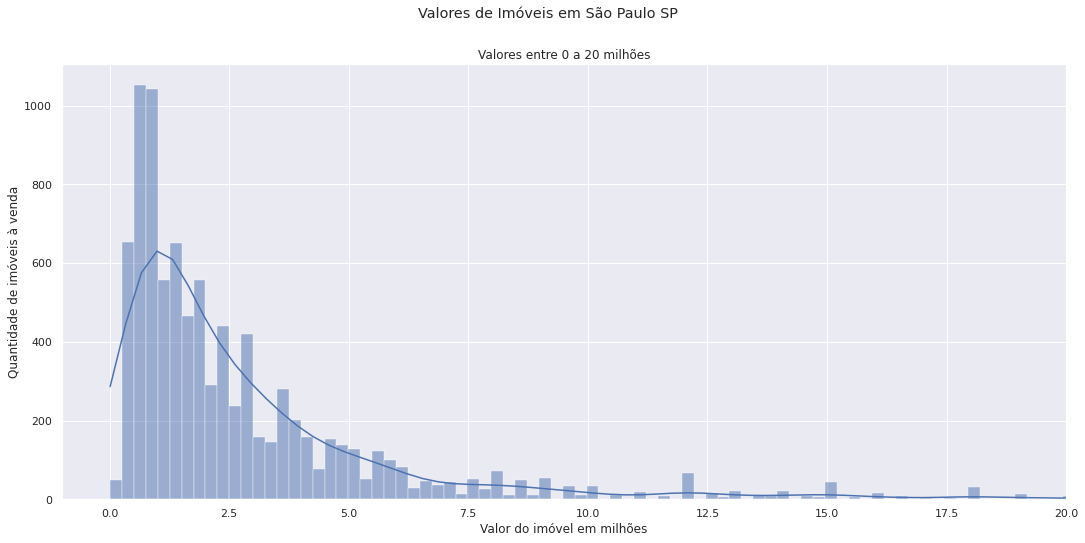

In [ ]:
sns.set()
plt.figure(figsize=(18,8))
sns.color_palette("flare")
plot = sns.histplot(data=dados_nova_escala, x='Valor_Anuncio_float', kde=True)
#Título, sub
plt.suptitle("Valores de Imóveis em São Paulo SP")
plt.title("Valores entre 0 a 20 milhões")
plt.xlabel("Valor do imóvel em milhões") #labels
plt.ylabel("Quantidade de imóveis à venda")

plt.xlim((-1, 20))
plt.show()